In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1_l2



(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

row,column,chanel = x_train.shape[1:]

model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(row,column,chanel),kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),activation="relu",padding="same",kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation="relu",padding="same",kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation="relu",padding="same",kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation="relu",padding="same",kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation="relu",padding="same",kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation="softmax"))

model.compile(Adam(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

result = model.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val))






170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3621 - loss: 2.8264 - val_accuracy: 0.5877 - val_loss: 1.8973
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6093 - loss: 1.7847 - val_accuracy: 0.6358 - val_loss: 1.6328
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6758 - loss: 1.4852 - val_accuracy: 0.7138 - val_loss: 1.3669
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 1.4049 - val_accuracy: 0.7112 - val_loss: 1.4055
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7221 - loss: 1.3819 - val_accuracy: 0.7448 - val_loss: 1.3412
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7395 - loss: 1.3485 - val_accuracy: 0.7560 - val_loss: 1.3054
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7531 - loss: 1.3226 - val_accuracy: 0.7440 - val_loss: 1.3490
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7641 - loss: 

In [2]:
model.save("/content/my_model.keras")

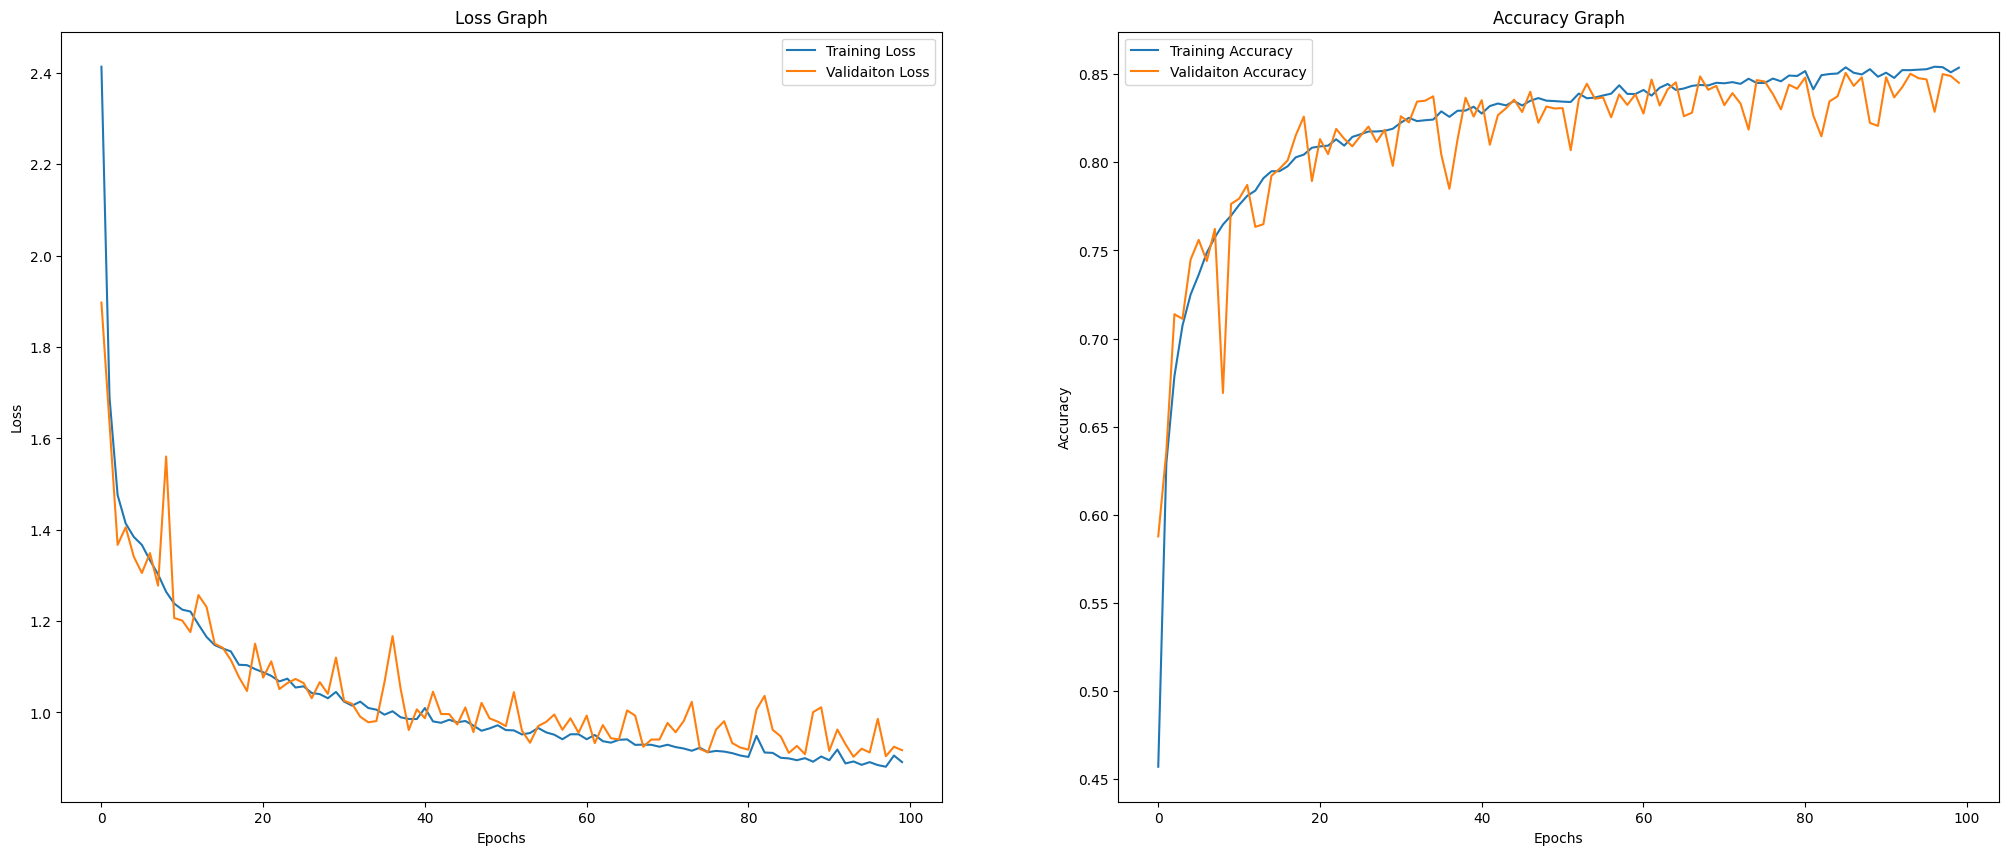

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(25,10))

ax[0].plot(result.history["loss"],label="Training Loss")
ax[0].plot(result.history["val_loss"],label="Validaiton Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(result.history["accuracy"],label="Training Accuracy")
ax[1].plot(result.history["val_accuracy"],label="Validaiton Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


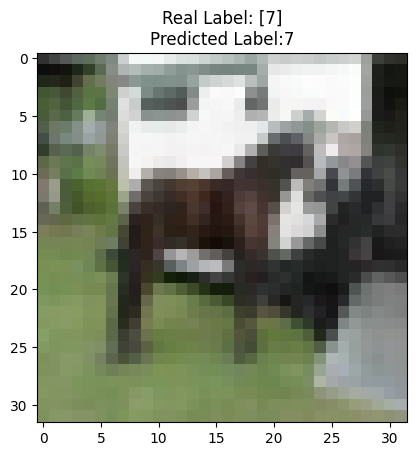

In [5]:
from keras.models import load_model
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

model1 = load_model("/content/my_model.keras")


(x_train,y_train),(x_test,y_test)=cifar10.load_data()

x_test = x_test.astype('float32')/255

pred = model1.predict(x_test)

i= 20
plt.imshow(x_test[i])
plt.title("Real Label: {}\nPredicted Label:{}".format(y_test[i],np.argmax(pred[i])))
plt.show()

